In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist  # MNIST data
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.losses import categorical_crossentropy #loss function
from tensorflow.python.keras.optimizers import Adam, SGD #optimisers
from tensorflow.python.keras.layers import Dense, Flatten

In [2]:
#using the lecture code

batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


#### Now randomly distribute the pictures in arrays of 50x50

In [3]:
picx = 28
picy = 28
bigpicx = 50
bigpicy = 50

def embed(pic, pos):
    # pos expects a tuple of slice objects
    bigpic = np.zeros((bigpicx, bigpicy))
    bigpic[pos] = pic
    return bigpic

def randpos():
    xpos = np.random.randint(0, (bigpicx-picx))
    ypos = np.random.randint(0, (bigpicy-picy))
    # we use np.s_ to return a tuple of slice objects
    return np.s_[xpos:xpos+picx, ypos:ypos+picy]

In [4]:
# the final processing of the data is quite compact using list comprehensions
x_train_original = x_train
x_test_original = x_test
x_train = np.array([embed(pic, randpos()) for pic in x_train])
x_test = np.array([embed(pic, randpos()) for pic in x_test])
x_train_conv = np.expand_dims(x_train, axis=3)
x_test_conv = np.expand_dims(x_test, axis=3)
x_train_original_conv = np.expand_dims(x_train_original, axis=3)
x_test_original_conv = np.expand_dims(x_test_original, axis=3)

#### Setting up a single hidden layer neural network 

In [84]:

model1 = tf.keras.Sequential()
model1.add(Flatten())
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))
model1.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'])


#### Training the network

In [85]:

hist1 = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 61s 1ms/step - loss: 1.4065 - acc: 0.5604 - val_loss: 0.8002 - val_acc: 0.7642
Epoch 2/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.6340 - acc: 0.8195 - val_loss: 0.5468 - val_acc: 0.8425
Epoch 3/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.4550 - acc: 0.8691 - val_loss: 0.4689 - val_acc: 0.8615
Epoch 4/20
60000/60000 [==============================] - 10s 170us/step - loss: 0.3692 - acc: 0.8947 - val_loss: 0.4337 - val_acc: 0.8678
Epoch 5/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.3120 - acc: 0.9114 - val_loss: 0.4129 - val_acc: 0.8737
Epoch 6/20
60000/60000 [==============================] - 10s 174us/step - loss: 0.2684 - acc: 0.9224 - val_loss: 0.3924 - val_acc: 0.8794
Epoch 7/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2364 - acc: 0.9326 - val_loss: 0.38

In [86]:
# evaluate model
score = model1.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 88us/step

Test loss: 0.4832173500210047
Test accuracy: 0.8764


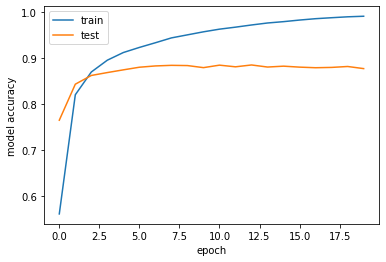

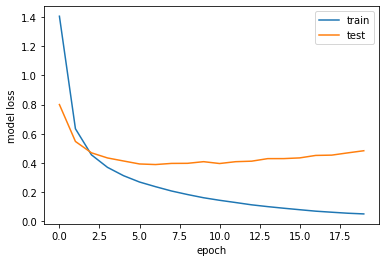

In [87]:
# summarize history for accuracy
plt.plot(hist1.history['acc'])
plt.plot(hist1.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#### The performance is quite good. Now we want to  improve the network by including convolutional layers

In [5]:
model2 = tf.keras.Sequential()

# Convolutional layers, including maxpooling
model2.add(tf.keras.layers.Conv2D(16, (5,5), input_shape=(50,50,1), activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model2.add(tf.keras.layers.Conv2D(16, (5,5), input_shape=(50,50,1), activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Flatten to prepare for dense layers
model2.add(tf.keras.layers.Flatten())

# Dense postprocessing
model2.add(tf.keras.layers.Dense(648, activation='relu'))

model2.add(tf.keras.layers.Dense(10, activation='softmax'))

model2.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 16)        6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1296)              0         
_________________________________________________________________
dense (Dense)                (None, 648)               840456    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6490      
Total para

In [6]:
batch_size = 128
epochs = 3

hist_model2 = model2.fit(x_train_conv, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test_conv, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 1172s 20ms/step - loss: 0.5606 - acc: 0.8188 - val_loss: 0.1758 - val_acc: 0.9449
Epoch 2/3
60000/60000 [==============================] - 1131s 19ms/step - loss: 0.1551 - acc: 0.9517 - val_loss: 0.1256 - val_acc: 0.9616
Epoch 3/3
60000/60000 [==============================] - 1028s 17ms/step - loss: 0.0952 - acc: 0.9704 - val_loss: 0.0954 - val_acc: 0.9694


KeyError: 'accuracy'

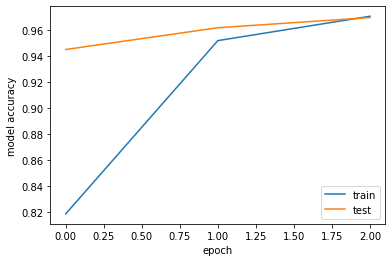

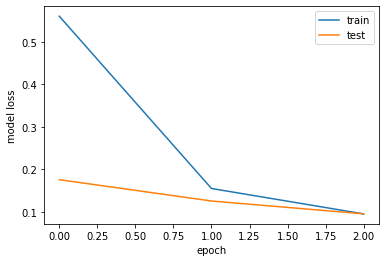

In [11]:
# summarize history for accuracy
plt.plot(hist_model2.history['acc'])
plt.plot(hist_model2.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(hist_model2.history['loss'])
plt.plot(hist_model2.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#### This convolutionary architecture gives accuracies up to 97 percent
#### Now a different network architecture with much bigger convolutional layers. 

In [12]:
model_conv2 = tf.keras.Sequential()

# Convolutional preprocessing
model_conv2.add(tf.keras.layers.Conv2D(64, (7,7), input_shape=(50,50,1), activation='relu'))
model_conv2.add(tf.keras.layers.MaxPooling2D(pool_size=3))
model_conv2.add(tf.keras.layers.Conv2D(128, ( 3,3), activation='relu'))
model_conv2.add(tf.keras.layers.MaxPooling2D(pool_size=3))
model_conv2.add(tf.keras.layers.Conv2D(192, (3,3), activation='relu'))
model_conv2.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Flatten to prepare for dense layers
model_conv2.add(tf.keras.layers.Flatten())

# Dense postprocessing
model_conv2.add(tf.keras.layers.Dense(128, activation='relu'))

model_conv2.add(tf.keras.layers.Dense(10, activation='softmax'))

model_conv2.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model_conv2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 44, 44, 64)        3200      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 192)         221376    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 192)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 1379s 23ms/step - loss: 0.4162 - acc: 0.8654 - val_loss: 0.1224 - val_acc: 0.9612
Epoch 2/3
60000/60000 [==============================] - 1582s 26ms/step - loss: 0.0964 - acc: 0.9703 - val_loss: 0.0645 - val_acc: 0.9786
Epoch 3/3
60000/60000 [==============================] - 1583s 26ms/step - loss: 0.0596 - acc: 0.9816 - val_loss: 0.0573 - val_acc: 0.9795


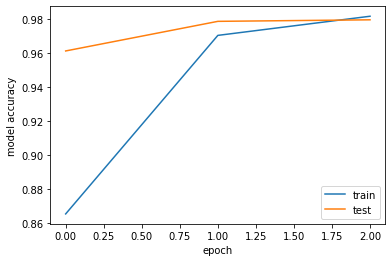

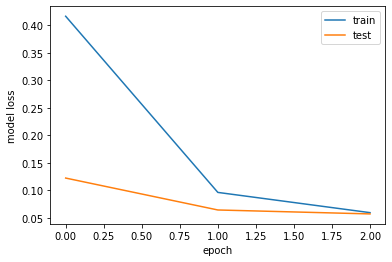

In [13]:
batch_size = 128
epochs = 3

hist_conv2 = model_conv2.fit(x_train_conv, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_conv, y_test))

# summarize history for accuracy
plt.plot(hist_conv2.history['acc'])
plt.plot(hist_conv2.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(hist_conv2.history['loss'])
plt.plot(hist_conv2.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#### This improves the performance slightly up to 98%

In [14]:
model_conv3 = tf.keras.Sequential()

# Convolutional preprocessing
model_conv3.add(tf.keras.layers.Conv2D(64, (7,7), input_shape=(50,50,1), use_bias=False))
model_conv3.add(tf.keras.layers.BatchNormalization())
model_conv3.add(tf.keras.layers.Activation('relu'))

model_conv3.add(tf.keras.layers.MaxPooling2D(pool_size=3))

model_conv3.add(tf.keras.layers.Conv2D(128, (3,3), use_bias=False))
model_conv3.add(tf.keras.layers.BatchNormalization())
model_conv3.add(tf.keras.layers.Activation('relu'))

model_conv3.add(tf.keras.layers.MaxPooling2D(pool_size=3))

model_conv3.add(tf.keras.layers.Conv2D(192, (3,3), use_bias=False))
model_conv3.add(tf.keras.layers.BatchNormalization())
model_conv3.add(tf.keras.layers.Activation('relu'))
model_conv3.add(tf.keras.layers.Dropout(0.5))

model_conv3.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Flatten to prepare for dense layers
model_conv3.add(tf.keras.layers.Flatten())

# Dense postprocessing
model_conv3.add(tf.keras.layers.Dense(128, use_bias=False))
model_conv3.add(tf.keras.layers.BatchNormalization())
model_conv3.add(tf.keras.layers.Activation('relu'))

model_conv3.add(tf.keras.layers.Dense(10, activation='softmax'))

model_conv3.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model_conv3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 44, 44, 64)        3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 44, 44, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73728     
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 128)       0         
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2947s 49ms/step - loss: 0.3048 - acc: 0.9067 - val_loss: 0.1218 - val_acc: 0.9643
Epoch 2/2
60000/60000 [==============================] - 2933s 49ms/step - loss: 0.0870 - acc: 0.9734 - val_loss: 0.0862 - val_acc: 0.9736


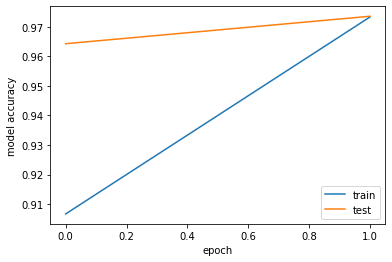

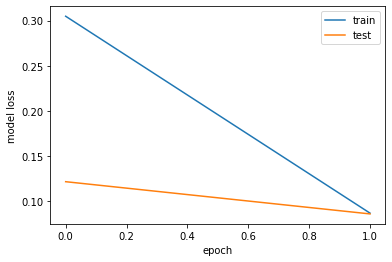

In [15]:
batch_size = 64
epochs = 2

hist_conv3 = model_conv3.fit(x_train_conv, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_conv, y_test))


# summarize history for accuracy
plt.plot(hist_conv3.history['acc'])
plt.plot(hist_conv3.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(hist_conv3.history['loss'])
plt.plot(hist_conv3.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#### This doesnt yield a significant improvement